## Introduction

This is a networkX tutorial on how to create informative visuals for displaying graphs through various visual properites outside of the simple connections between nodes. Graphs that model real world relationships are complex and more often than not they are unable to be represented informatively through a simple graph. For instance, how can we model the size of different states on a map of the United States or how can we display vertices with different weights and layouts in a visually pleasing manner? This tutorial will show how to use networkX to display these various properties through colorings, vertex sizings, and layout algorithms.  

A complex and beautiful instance of the importance of graph representation outside of connections can be shown in the following graph, 

[<img src="http://unfiltered.groupsjr.com/wp-content/uploads/2015/05/The-internet-map.png">](http://internet-map.net/) 
(click for entire interactive map of the internet)

This is a graph representing the different websites on the internet. In this graph the nodes are different websites on the internet whose size is determined by the amount of daily traffic each website has. For example, the biggest node is Google.com because it is the most visited site in the world. At the same time this graph is also colored in correspondence to similarity relationships between websites (websites with hosts in Japan are colored purple). This is one of few examples that show the impact of visuals outside of simple nodes and edges on the aesthetics and information presented in graphs.

# Tutorial Sections

This tutorial will touch on the basics of networkX and introduce interesting visuals that can be achieved.

## Table of Contents
- [Importing the libraries](#Installing-the-libraries)
- [NetworkX Basics](#NetworkX-Basics)
- [Vertex, Edge, and Graph Colorings](#Vertex-&-Edge-colors-+-Graph-Coloring)
- [Vertex Augmentation](#Vertex-Augmentation)
- [Layout Algorithms](#Layout-Algorithms)
- [Example Application: 48 Contiguous United States Graph Colorability](#Example-Application:-48-Contiguous-United-States-Colorability)

### Installing the libraries
To begin use the following commands to import the packages necessary to create our graphs. Note that we will be using the native networkX package to construct graphs and python's matplotlib.pyplot package to display them.

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

## NetworkX Basics

All operations we will be performing will be upon graphs. To initialize an empty graph you can use the default networkX graph constructor.

In [4]:
G = nx.Graph()    # creates an empty undirected graph
G2 = nx.DiGraph() # creates an empty directed graph

You can add a node to the graph through the *add_node* function, or simply add an edge to the graph through the *add_edge* function. NetworkX will infer the creation of nodes not yet specified in the graph. The bulk operations for adding multiple nodes and edges are *add_nodes_from* and *add_edges_from* respectively. Note that you can remove edges with the same function calls using the keyword *remove* instead of *add*.

In [5]:
G.add_node('X')
G.add_node('Y')
G.add_node('Z')
G.add_nodes_from(range(3)) # adds nodes [0, 1, 2]

G.add_edge(0,1)
G.add_edge(1,2)
G.add_edge(2,3) # adds node 3 because it doesn't exist in the graph
G.add_edges_from([("X","Y"), ("X","Z"), ("Y","Z"), ("Z",1)])

With matplotlib.pyplot enabled you can draw a visualization of a networkX graph using the *draw* function. We set the parameter *with_labels* to True to display the vertex labels when drawing the graph. You can view this [link](https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html#networkx.drawing.nx_pylab.draw_networkx) for a reference to all optional parameters to the *draw* function.

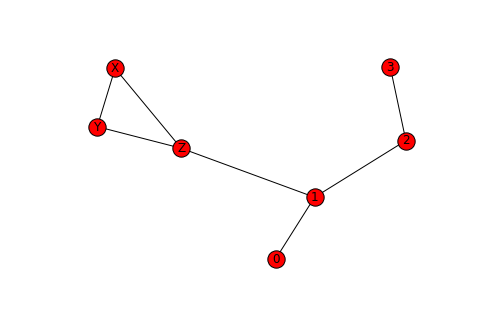

In [6]:
nx.draw(G, with_labels=True)

You can access nodes and edges in the graph through several methods provided by networkX. The graph can be indexed by the nodes in the graph to get all outgoing edges from the indexed node. Providing both indices of endpoints of an edge on a graph will allow you to access the attributes of that edge.

In [7]:
print 'number of nodes', G.number_of_nodes()
print 'number of edges', G.number_of_edges()
print 'nodes in the graph', G.nodes()
print 'edges in the graph', G.edges()
print G[2]
print G[1][2]

number of nodes 7
number of edges 7
nodes in the graph [0, 1, 2, 3, 'Y', 'X', 'Z']
edges in the graph [(0, 1), (1, 2), (1, 'Z'), (2, 3), ('Y', 'X'), ('Y', 'Z'), ('X', 'Z')]
{1: {}, 3: {}}
{}


## Vertex & Edge colors + Graph Coloring

There are times when it is useful to represent vertices with different colors. Furthermore you can also use built-in networkX graph coloring algorithms to define a legal coloring on your graph (see [Graph Coloring Wiki](https://en.wikipedia.org/wiki/Graph_coloring)). Colors can be defined in networkX as a color string (ie. red, blue, green) or a float, defined in [matplotlib color api](http://matplotlib.org/api/colors_api.html). Below is a simple example where we color the graph above by alternating colors between consecutive nodes and edges in the graph's listing. 

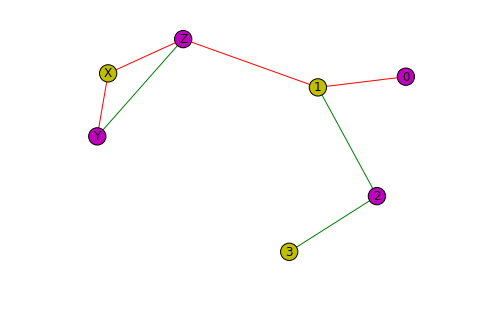

In [8]:
node_colors = ['m' if i % 2 == 0 else 'y' for i in range(G.number_of_nodes())]
edge_colors = ['r' if i % 2 == 0 else 'g' for i in range(G.number_of_edges())]
nx.draw(G, with_labels=True, node_color=node_colors, edge_color=edge_colors)

To define an explicit mapping between nodes and their colors you can define a dictionary that maps nodes to colors and map over the node listings accordingly,

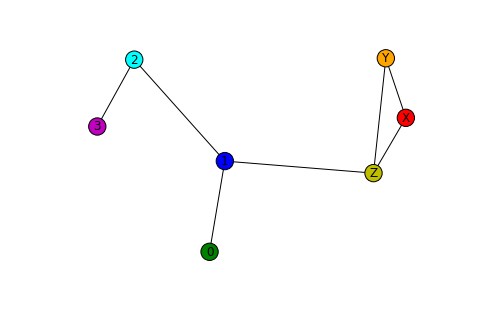

In [9]:
color_map = {'X' : 'r', 'Y' : 'orange', 'Z' : 'y', 0 : 'g', 1 : 'b', 2 : 'cyan', 3 : 'm'}
nx.draw(G, with_labels=True, node_color=[color_map[i] for i in G.nodes()], edge_color='k')

More interestingly we can also run the built-in networkX graph coloring functionality to define a legal graph coloring on any graph. The function *greedy_color* outputs a valid graph coloring on an input graph $G$. We can tune the coloring performed in this algorithm to our liking through various optional parameters to define the control flow of the algorithm performing the coloring.

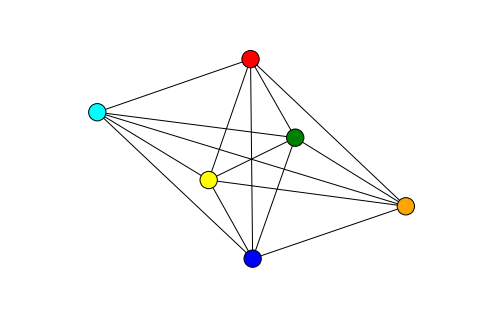

In [10]:
k_6 = nx.complete_graph(6)
gc = nx.greedy_color(k_6, strategy=nx.coloring.strategy_random_sequential)
# Strategy Optional Parameter
# - strategy_largest_first - colors the nodes in order of largest degrees first
# - strategy_random_sequential - colors nodes in completely random order
# - strategy_smallest_last - considers the smallest degree vertices at the very end of the coloring
# - strategy_independent_set - creates a maximal independent set of vertices and colors each in order
# - and more
colors = ['red', 'blue', 'green', 'yellow', 'orange', 'cyan']
coloring = [colors[c] for c in gc.values()]
nx.draw(k_6, node_color=coloring)

As you can see the coloring that networkX generates is valid and optimal. This is because on a complete graph (the one we created) every vertex has an edge incident on every other vertex and therefore we need a different color for every different vertex. For a tree graph (no cycles), the optimal coloring would only require two colors since there are no cycles. NetworkX properly handles this case as shown below,

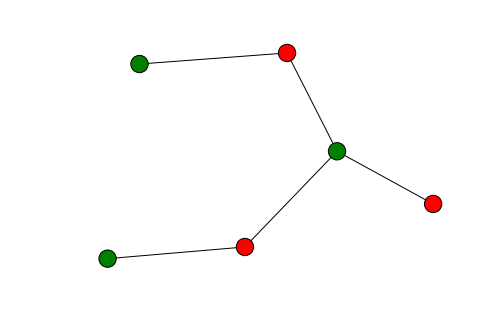

In [11]:
G3 = nx.Graph()
G3.add_edges_from([("A","B"), ("B","C"), ("C","D"), ("C","E"), ("E","F")])
gc = nx.greedy_color(G3)
nx.draw(G3, node_color=['green' if i == 0 else 'red' for i in gc.values()])

As you can see the coloring for the tree graph used $2$ colors as expected. Since networkX generates the optimal coloring on the graph we can also use this library to determine whether a given graph is $k$-colorable, which is an important question arising in computer science fields (NP-complete problem). In a real world application this functionality could be used to display graph visuals aesthetically by having different colors for neighboring vertices without complicating the graph with too many colors. For instance, the countries on a world map are all given different colors from their neighbors so to not confuse viewers of the borders of each country. As shown, the networkX graph library has the capability of defining this coloring for a world map or any other analagous instance where this problem could arise.

## Vertex Augmentation

Another useful dimension we can add to graphs is vertex sizings and shapes. NetworkX allows for drawing graphs with vertices of different sizes. This could be particulary useful in a graph where vertices are weighted; The weighted vertices could be shown in different sizes, which would be much more intuitive than printing a simple weight label. A small real example is shown below (graph of the states around the tri-state area).

##### Size and Color
We can set the sizes and colors of nodes as optional parameters to the netowrkX draw function.

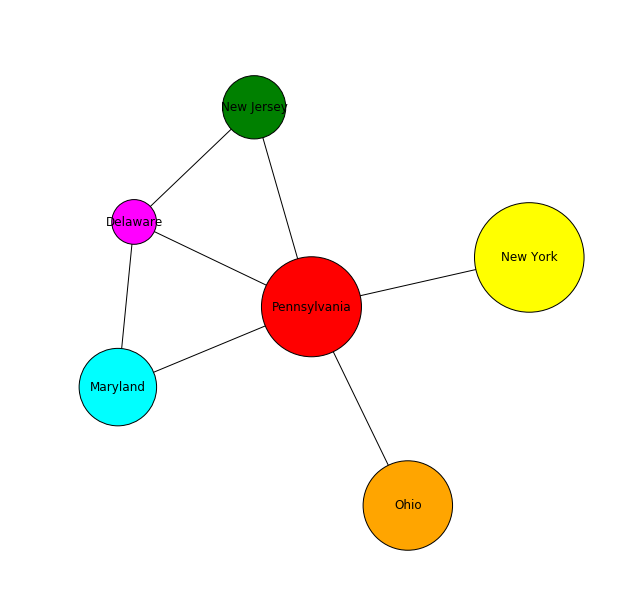

In [12]:
States = nx.Graph()
# States around tristate area
States.add_nodes_from(["Pennsylvania", "Ohio", "New Jersey", "New York", "Maryland", "Delaware"])

# Sizes of states in dictionary
state_sizes = {
    "Pennsylvania" : 10000, 
    "Ohio" : 8000, 
    "New Jersey" : 4000, 
    "New York" : 12000, 
    "Maryland" : 6000, 
    "Delaware" : 2000}

States.add_edge("Pennsylvania",  "Ohio")
States.add_edge("Pennsylvania",  "New Jersey")
States.add_edge("Pennsylvania",  "New York")
States.add_edge("Pennsylvania",  "Maryland")
States.add_edge("Pennsylvania",  "Delaware")

States.add_edge("Delaware",  "Maryland")
States.add_edge("Delaware",  "New Jersey")


input_state_sizes = []
for i in States.nodes():
    input_state_sizes.append(state_sizes[i])
colors = ['red', 'magenta', 'green', 'yellow', 'orange', 'cyan']
plt.figure(figsize=(8,8))
nx.draw(States, with_labels=True, node_size=input_state_sizes, node_color=colors)

##### Shapes
Likewise we can augment the shapes of the nodes to provide further identification behind their meanings. This is a good way to better visualize data that is understood better with different polygons rather than the default circular nodes we are used to seeing. The choices for node shapes are as follows: square, circle (default), triangle (oriented 0,90,180,270 degrees), diamond, pentagon, hexagon, and octogon. The above drawing when run will choose a random shape from those available.

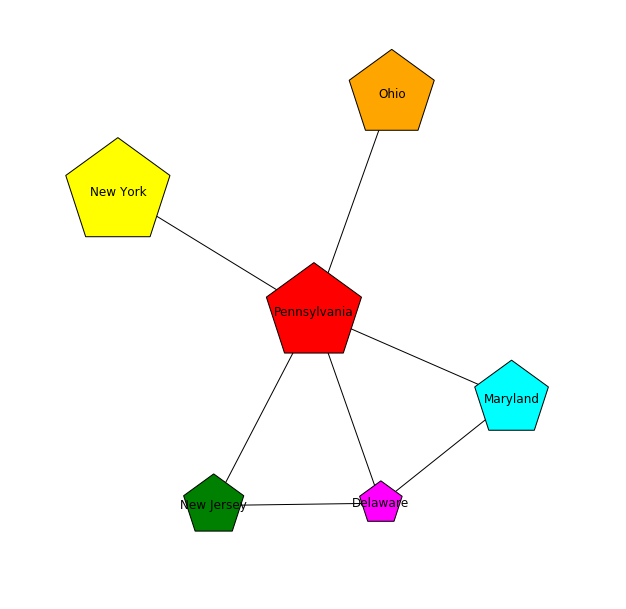

In [13]:
import random
shapes = 'so^>v<dph8'
i = random.randint(0, len(shapes) - 1)
state_shape = shapes[i]
plt.figure(figsize=(8,8))
nx.draw(States, with_labels=True, node_size=input_state_sizes, node_color=colors, node_shape=state_shape)

##### Positioning
We have shown that we can change the sizings of nodes, their colors, and even the shapes which they take. However it sometimes is necessary to position the nodes as well in many data visualization scenarios. For instance, the above graph details States existing around the tri-state area whose vertex sizes correspond to the sizes of the states themselves. However, each state also has its own geographic position on the world map. To represent this real world relation we can fix the positions of nodes in networkX graphs to exist at certain locations. To do so we define a layout (we will toch on this in the next section) and pass in an optional parameter to fix the locations of nodes we choose. The layout will fix the chosen nodes first and then assume its own properties for the remainder of the graph. To illustrate this we fix the actual relative locations of the states below.

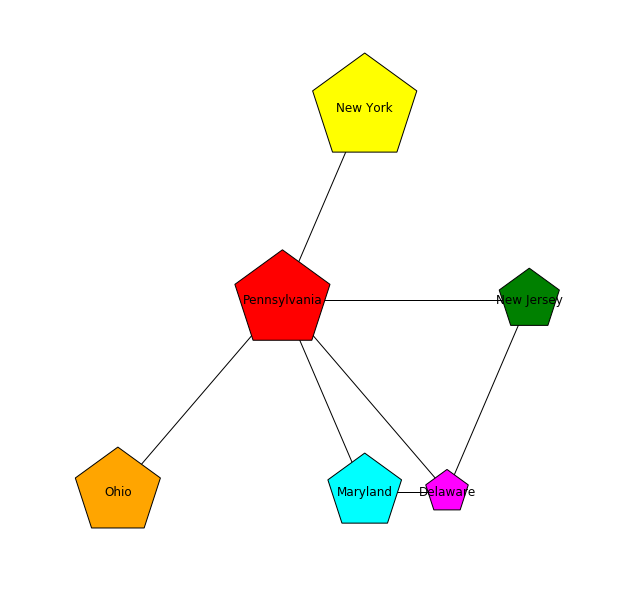

In [14]:
# Fixed positions of nodes
fixed_positions = {
    'Pennsylvania' : (0,0),
    'Ohio' : (-2,-1),
    'Maryland' : (1,-1),
    'Delaware' : (2,-1),
    'New Jersey' : (3,0),
    'New York' : (1,1)
}
fixed_nodes = fixed_positions.keys()
pos = nx.spring_layout(States,pos=fixed_positions, fixed=fixed_nodes)
plt.figure(figsize=(8,8))
nx.draw(States, pos, with_labels=True, node_size=input_state_sizes, node_color=colors, node_shape=state_shape)

## Layout Algorithms

Sometimes the graph that are displayed with many graph libraries are complex and difficult to read. Other times when we build a graph we want to fix vertices in certain positions and locations as to provide extra information about the graph. NetworkX allows for this by providing several flexible graph layout algorithms as well as explicit vertex positioning. THe built-in layout algorithms available are,

- circular layout
- random layout
- shell layout
- spring layout
- spectral layout
- fruchterman reingold layout

To elaborate, we can make graph visuals more intuitive and aethetically pleasing by taking advantage of networkX node and edge positioning algorithms/functionality to best represent our graphs. This can be applied to many problem instances. For example, perhaps we have a star graph where most of the edges are incident on a single central node. Rather than displaying a randomly sparse graph we can equally position the nodes around the center to provide the best representation of the graph. Another instance could be where we wish for the nodes in the graph to be the equally spread out amongst each other so that we can have the clearest view of the edges in the graph. NetworkX provides the tools to deal with these problem cases and many more as we will demonstrate below. 

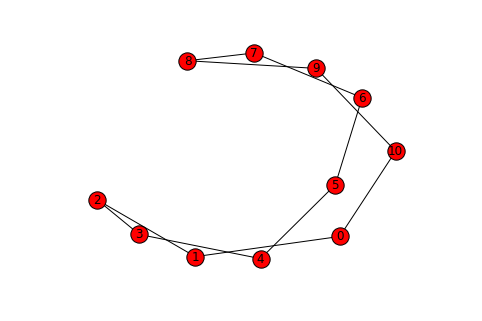

In [15]:
G4 = nx.Graph()
for i in range(10):
    G4.add_edge(i,i+1)
G4.add_edge(10,0)

nx.draw(G4, with_labels=True)

As you can see above, by simply just drawing the default graph for the star graph, the orientation of the edges and positioning of the nodes are neither symmetrical nor consistent. Sometimes the graph will be laid out in a circular fashion, however on average the edges and nodes are out of place. We can improve the asthetics of the graph by inputing predefined positions calculated by one of the provided networkX layout algorithms.

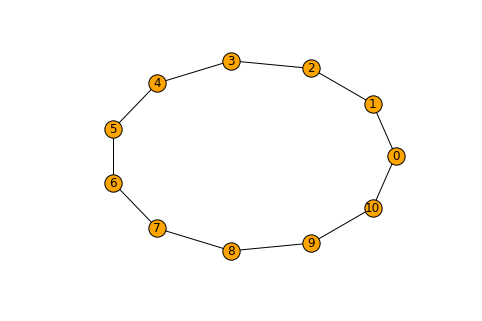

In [16]:
nx.draw(G4, with_labels=True, node_color='orange', pos=nx.circular_layout(G4))

Since every node is connected to two other nodes only, the circular layout is able to display the graph elegantly by equally spacing nodes around in a circle. Another common graph that occurs is a complete graph, ie. every node is connected to every other node.

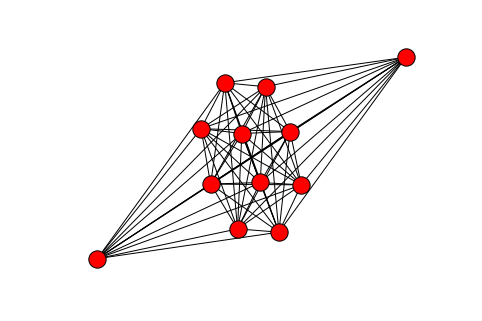

In [17]:
k12 = nx.complete_graph(12)
nx.draw(k12)

The above default graph is spaced nicely in terms of nodes, however the prevaling edges are cluttered and illegible. We can use the spring layout to solve this because it is a force-algorithm that works towards spacing nodes away from each other by at least a certain distance. By specifying an approximate distance spacing of $k=10$ we can get a much cleaner graph as shown below.

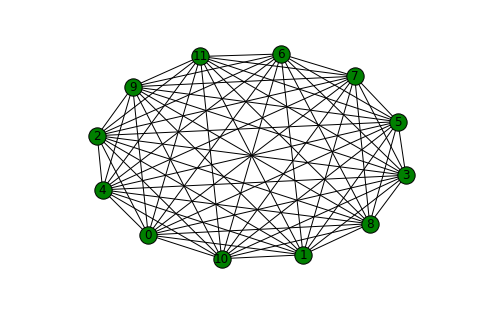

In [18]:
nx.draw(k12, with_labels=True, node_color='green', pos=nx.spring_layout(k12, k=10))

## Example Application: 48 Contiguous United States Colorability
NetworkX is a great data science visualization package that easily lets you define very functional and effective graphs. This tutorial showed some concepts related to graph visuals and operations that are important for visualizing and interpreting data. One example for which networkX works very well is mapping atlases. Below we define an example graph of the 48 contiguous United States. We plan on plotting these states in their respestive position on the map and with their connections to neighboring states. We also will show that the United States is 4-colorable through the NetworkX greedy coloring algorithm demonstrated earlier in the tutorial (Note that the world map 4-colorability problem is an important problem in CS [4-Color Theorem](https://en.wikipedia.org/wiki/Four_color_theorem)).

### Import Data
To simplify retrieving the locations of the states and their connections we have two txt/csv files for which we will retrieve this data ('state_latlon.csv' for latitude and longitude of states and 'state_adjacencies.txt' for state by state edge list).

In [19]:
import csv
state_locations = {} # dictionary of 'state' : (latitude, longitude)
state_adj = []       # list of tuples of state adjacencies (edges)
states = []

with open('state_latlon.csv', 'rb') as csvfile:
    state_location_reader = csv.reader(csvfile, delimiter=',')
    for row in state_location_reader:
        states.append(row[0])
        state_locations[row[0]] = (float(row[2]), float(row[1]))
with open('state_adjacencies.txt', 'rb') as csvfile:
    state_adj_reader = csv.reader(csvfile, delimiter=' ')
    for row in state_adj_reader:
        state_adj.append((row[0],row[1]))

### Graph Creation
With the graph data we will now procede to define the graph of the  4 contiguous states.

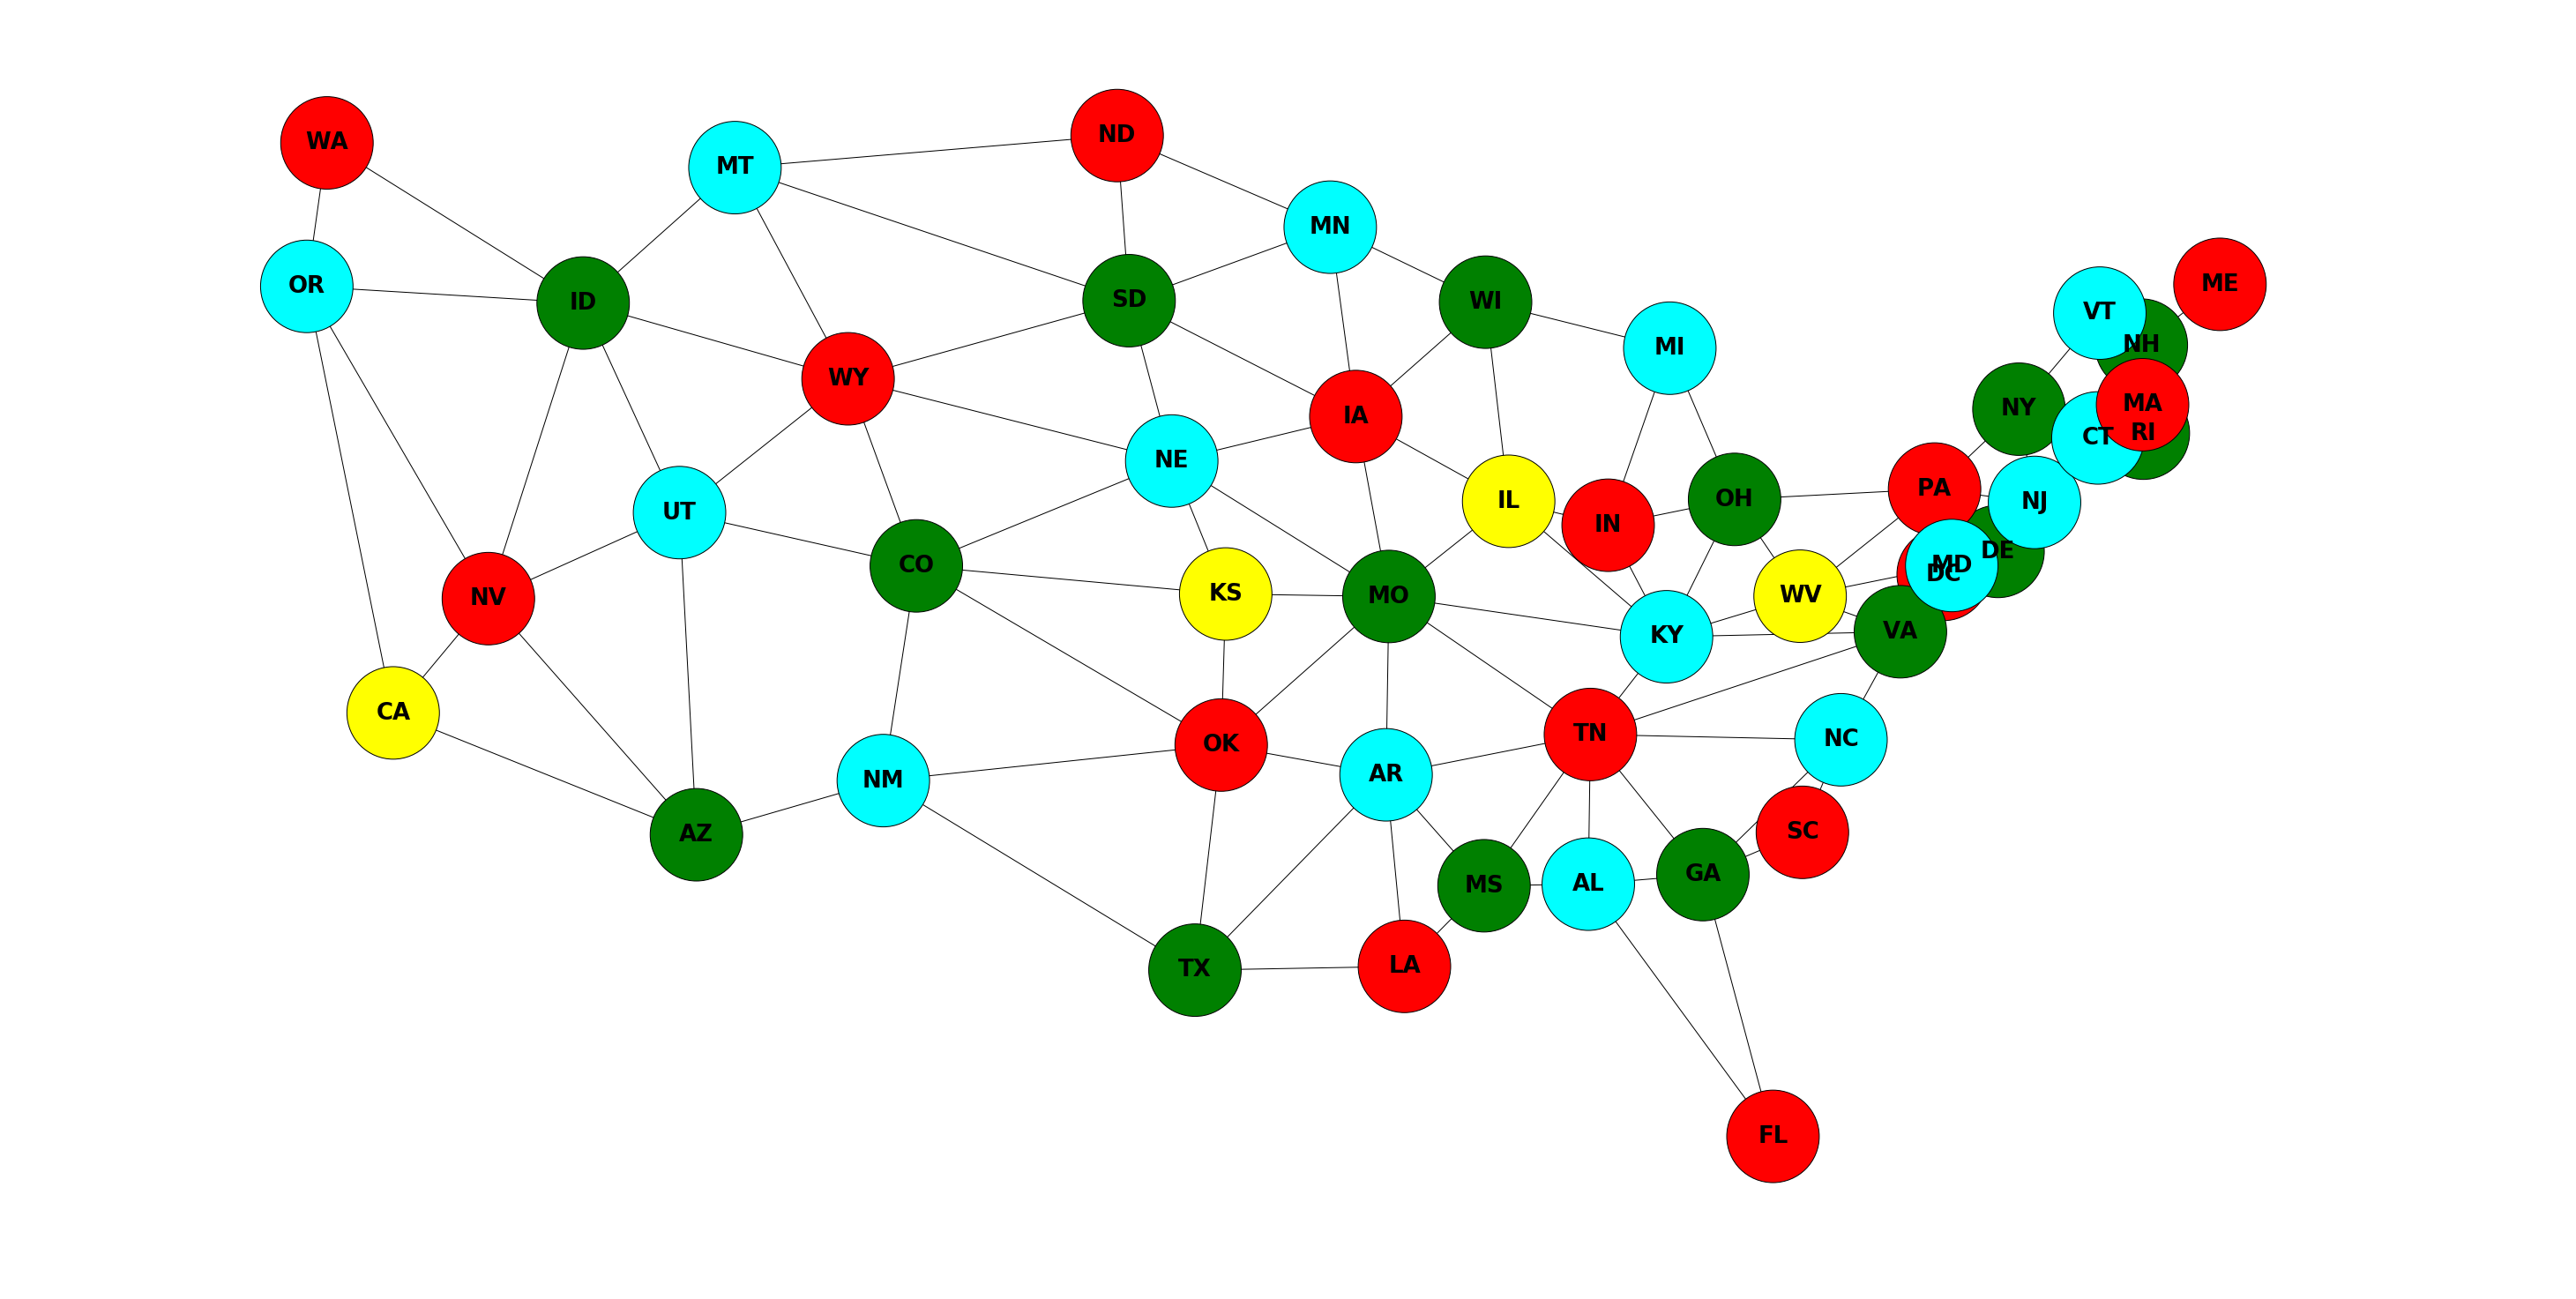

In [20]:
Atlas = nx.Graph()   # Atlas graph of 4 contiguous united states
fixed_positions = {} # dictionary of 'state':(fixed x, fixed y)

# Add nodes and edges to atlas graph
Atlas.add_nodes_from(states)
Atlas.add_edges_from(state_adj)

# Create layout with fixed state positions
fixed_nodes = state_locations.keys()
pos = nx.spring_layout(Atlas,pos=state_locations, fixed=fixed_nodes)
plt.figure(figsize=(40,20))

# Run greedy color algorithm to retrieve valid coloring
gc = nx.greedy_color(Atlas)

# draw graph with coloring
colors = {0:'red', 1:'green', 2:'cyan', 3:'yellow'}
nx.draw(Atlas, pos, with_labels=True, node_size=11000, node_color=[colors[i] for i in gc.values()], font_size=26, font_weight='bold')
plt.savefig("usa_network_graph_4_color.pdf")

As you can see, with networkX we were able to verify a valid 4-coloring on the 4 contiguous states. Also we are able to use the skills in this tutorial to display the coloring of the map in a functional and intuitive manner. Using NetworkX tools that are highlighted by this tutorial you will be able to define and draw aesthetic graphs with great functionality.